In [1]:
import pandas as pd
import sqlalchemy

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# http://docs.sqlalchemy.org/en/rel_1_0/core/engines.html
engine = sqlalchemy.create_engine('sqlite:///flightdata.sqlite3')

#reflect database schema
meta = sqlalchemy.MetaData()
meta.reflect(bind=engine)
print(meta.tables.keys())

[u'flights', u'sqlite_stat1']


In [4]:
meta.tables['flights']

Table('flights', MetaData(bind=None), Column('year', INTEGER(), table=<flights>), Column('month', INTEGER(), table=<flights>), Column('day', INTEGER(), table=<flights>), Column('dep_time', INTEGER(), table=<flights>), Column('dep_delay', REAL(), table=<flights>), Column('arr_time', INTEGER(), table=<flights>), Column('arr_delay', REAL(), table=<flights>), Column('carrier', TEXT(), table=<flights>), Column('tailnum', TEXT(), table=<flights>), Column('flight', INTEGER(), table=<flights>), Column('origin', TEXT(), table=<flights>), Column('dest', TEXT(), table=<flights>), Column('air_time', REAL(), table=<flights>), Column('distance', REAL(), table=<flights>), Column('hour', REAL(), table=<flights>), Column('minute', REAL(), table=<flights>), schema=None)

In [5]:
# Load data into Pandas dataframe
alldata = pd.read_sql('select * from flights', engine)

In [6]:
# Inspect the dataframe
alldata.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
1,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
2,2013,1,1,542,2,923,33,AA,N619AA,1141,JFK,MIA,160,1089,5,42
3,2013,1,1,544,-1,1004,-18,B6,N804JB,725,JFK,BQN,183,1576,5,44
4,2013,1,1,554,-6,812,-25,DL,N668DN,461,LGA,ATL,116,762,5,54


# Pandas data manipulation

In [7]:
# Pandas

%time alldata = pd.read_sql('select * from flights', engine)
alldata.sort('dep_delay', ascending=False).head(10)

CPU times: user 3.94 s, sys: 310 ms, total: 4.26 s
Wall time: 4.32 s


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
7072,2013,1,9,641,1301,1242,1272,HA,N384HA,51,JFK,HNL,640,4983,6,41
235778,2013,6,15,1432,1137,1607,1127,MQ,N504MQ,3535,JFK,CMH,74,483,14,32
8239,2013,1,10,1121,1126,1239,1109,MQ,N517MQ,3695,EWR,ORD,111,719,11,21
327043,2013,9,20,1139,1014,1457,1007,AA,N338AA,177,JFK,SFO,354,2586,11,39
270376,2013,7,22,845,1005,1044,989,MQ,N665MQ,3075,JFK,CVG,96,589,8,45
173992,2013,4,10,1100,960,1342,931,DL,N959DL,2391,JFK,TPA,139,1005,11,0
151974,2013,3,17,2321,911,135,915,DL,N927DA,2119,LGA,MSP,167,1020,23,21
247040,2013,6,27,959,899,1236,850,DL,N3762Y,2007,JFK,PDX,313,2454,9,59
270987,2013,7,22,2257,898,121,895,DL,N6716C,2047,LGA,ATL,109,762,22,57
87238,2013,12,5,756,896,1058,878,AA,N5DMAA,172,EWR,MIA,149,1085,7,56


In [8]:
# SQL alchemy 
from sqlalchemy.sql import select, func

flights_table = meta.tables['flights']
myquery = select([flights_table])
myquery = myquery.order_by(flights_table.c.dep_delay.desc())
myquery = myquery.limit(10)
%time pd.read_sql(myquery, engine)

CPU times: user 1.16 s, sys: 69.9 ms, total: 1.23 s
Wall time: 1.28 s


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,9,641,1301,1242,1272,HA,N384HA,51,JFK,HNL,640,4983,6,41
1,2013,6,15,1432,1137,1607,1127,MQ,N504MQ,3535,JFK,CMH,74,483,14,32
2,2013,1,10,1121,1126,1239,1109,MQ,N517MQ,3695,EWR,ORD,111,719,11,21
3,2013,9,20,1139,1014,1457,1007,AA,N338AA,177,JFK,SFO,354,2586,11,39
4,2013,7,22,845,1005,1044,989,MQ,N665MQ,3075,JFK,CVG,96,589,8,45
5,2013,4,10,1100,960,1342,931,DL,N959DL,2391,JFK,TPA,139,1005,11,0
6,2013,3,17,2321,911,135,915,DL,N927DA,2119,LGA,MSP,167,1020,23,21
7,2013,6,27,959,899,1236,850,DL,N3762Y,2007,JFK,PDX,313,2454,9,59
8,2013,7,22,2257,898,121,895,DL,N6716C,2047,LGA,ATL,109,762,22,57
9,2013,12,5,756,896,1058,878,AA,N5DMAA,172,EWR,MIA,149,1085,7,56


In [9]:
# Equivalent to the following SQL statement
print(myquery)

SELECT flights.year, flights.month, flights.day, flights.dep_time, flights.dep_delay, flights.arr_time, flights.arr_delay, flights.carrier, flights.tailnum, flights.flight, flights.origin, flights.dest, flights.air_time, flights.distance, flights.hour, flights.minute 
FROM flights ORDER BY flights.dep_delay DESC
 LIMIT :param_1


# Regression model example

In [10]:
from datetime import datetime 

# Define late as departure 30 minutes later than expected
alldata['is_late'] = (alldata['dep_delay']>30)
# Convert year, month, day into a datetime object
alldata['date'] = alldata.apply(
    lambda x: datetime(x.year,x.month,x.day).date(), axis=1)
# Compute the proportion of flights late on each day
late_df = alldata.groupby('date')['is_late'].mean().reset_index()
# Tag the date with a dayofweek tag
late_df['dayofweek'] = late_df['date'].map(lambda x: x.isoweekday())

In [11]:
import statsmodels.formula.api as smf

mod = smf.ols(formula= 'is_late ~ C(dayofweek)', data=late_df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                is_late   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     3.819
Date:                Sat, 07 Nov 2015   Prob (F-statistic):            0.00105
Time:                        02:43:47   Log-Likelihood:                 368.15
No. Observations:                 365   AIC:                            -722.3
Df Residuals:                     358   BIC:                            -695.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.1583      0.012     12.809      0.000         0.134     0.183
C(dayofweek)[T.2]    -0.0269      0.017     -1.547      0.123        -0.061     0.007
C(dayofweek)[T.3]    -0.0236      0.017     -1.352      0.177        -0.058     0.011
C(dayofweek)[T.4]     0.0119      0.017      0.680      0.497        -0.022     0.046
C(dayofweek)[T.5]     0.0018      0.017      0.104      0.917        -0.033     0.036
C(dayofweek)[T.6]    -0.0595      0.017     -3.406      0.001        -0.094    -0.025
C(dayofweek)[T.7]    -0.0254      0.017     -1.453      0.147        -0.060     0.009
==============================================================================
Omnibus:                       52.692   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.497
Skew:                           1.051   Prob(JB):                     2.98e-16
Kurtosis:                       3.532   Cond. No.                         7.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

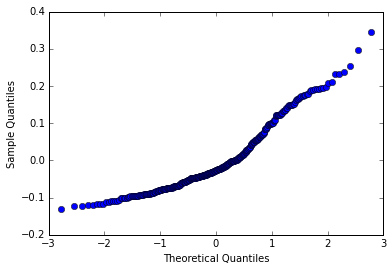

In [12]:
# Diagnostic plot

import statsmodels.api as sm
from matplotlib import pyplot as plt
fig = sm.qqplot(res.resid)
plt.show()

## Not quite normal.  

In [13]:
mod = smf.ols(formula= 'is_late ~ C(dayofweek,levels=[6,1,2,3,4,5,7])', data=late_df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                is_late   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     3.819
Date:                Sat, 07 Nov 2015   Prob (F-statistic):            0.00105
Time:                        02:43:47   Log-Likelihood:                 368.15
No. Observations:                 365   AIC:                            -722.3
Df Residuals:                     358   BIC:                            -695.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------------
Intercept                                           0.0988      0.012      7.992      0.000         0.074     0.123
C(dayofweek, levels=[6, 1, 2, 3, 4, 5, 7])[T.1]     0.0595      0.017      3.406      0.001         0.025     0.094
C(dayofweek, levels=[6, 1, 2, 3, 4, 5, 7])[T.2]     0.0326      0.017      1.875      0.062        -0.002     0.067
C(dayofweek, levels=[6, 1, 2, 3, 4, 5, 7])[T.3]     0.0359      0.017      2.054      0.041         0.002     0.070
C(dayofweek, levels=[6, 1, 2, 3, 4, 5, 7])[T.4]     0.0714      0.017      4.086      0.000         0.037     0.106
C(dayofweek, levels=[6, 1, 2, 3, 4, 5, 7])[T.5]     0.0613      0.017      3.510      0.001         0.027     0.096
C(dayofweek, levels=[6, 1, 2, 3, 4, 5, 7])[T.7]     0.0341      0.017      1.953      0.052        -0.000     0.069
==============================================================================
Omnibus:                       52.692   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.497
Skew:                           1.051   Prob(JB):                     2.98e-16
Kurtosis:                       3.532   Cond. No.                         7.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
import numpy as np
mod = smf.ols(formula= 'np.log(is_late) ~ C(dayofweek)', data=late_df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(is_late)   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     3.943
Date:                Sat, 07 Nov 2015   Prob (F-statistic):           0.000785
Time:                        02:43:47   Log-Likelihood:                -336.09
No. Observations:                 365   AIC:                             686.2
Df Residuals:                     358   BIC:                             713.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -2.0594      0.085    -24.204      0.000        -2.227    -1.892
C(dayofweek)[T.2]    -0.1926      0.120     -1.608      0.109        -0.428     0.043
C(dayofweek)[T.3]    -0.1675      0.120     -1.392      0.165        -0.404     0.069
C(dayofweek)[T.4]     0.1228      0.120      1.021      0.308        -0.114     0.359
C(dayofweek)[T.5]     0.0485      0.120      0.403      0.687        -0.188     0.285
C(dayofweek)[T.6]    -0.3763      0.120     -3.127      0.002        -0.613    -0.140
C(dayofweek)[T.7]    -0.1047      0.120     -0.870      0.385        -0.341     0.132
==============================================================================
Omnibus:                       19.278   Durbin-Watson:                   1.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.114
Skew:                           0.056   Prob(JB):                       0.0173
Kurtosis:                       2.278   Cond. No.                         7.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

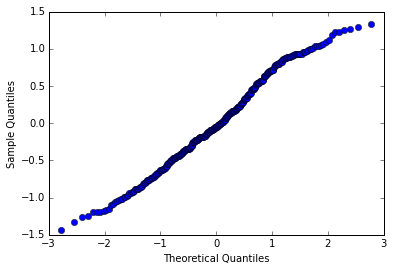

In [15]:
# Diagnostic plot

import statsmodels.api as sm
from matplotlib import pyplot as plt
fig = sm.qqplot(res.resid)
plt.show()

#Looks much better now